In [1]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# reading and shuffling the data
difference = 0
df = pd.read_csv("FoDS-A1.csv")
df = df.sample(frac = 1)

In [3]:
# normalising the data values

myData = (df - df.min()) / (df.max() - df.min())
X = myData.iloc[:, :-1]
y = myData.iloc[:, -1:]

In [4]:
# splitting the dataset into training data and testing data

splitData = int(0.7 * len(myData))
train_X, test_X, train_y, test_y = X[:splitData], X[splitData:], y[:splitData], y[splitData:]

iter_value = 200
iter_value+=1
skip_num=10
iter_scaled= int(((iter_value-1)/skip_num)+1)
coeff_list = np.zeros((10, 10, 10))
error_array = np.zeros((10, iter_scaled))

In [ ]:
def randomiseMatrix(deg):
    A = np.zeros((deg+1, deg+1))
    for m in range(deg+1):
            for n in range(deg+1-m):
                A[m][n] = np.random.randn()                 # assigning random values for weights
    return A            

In [5]:
def GD(deg, X, y, learning_rate, iterations):
    
    A = randomiseMatrix(deg)
                
    for itr in range(iterations):
        sumItrError = 0
        eachIFErrorList = []

        for z in range(len(X)):                           # for each row in input data
            row = X.iloc[z]                                     # contains strength, temperature
            column = y.iloc[z]                              # contains pressure
            eachIFError = 0                                  # variable for calculating error in each iteration
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    eachIFError += A[m][n]*(row[0]**m) * (row[1]**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            eachIFError -= column[0]                    # (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...) - yn 
            eachIFErrorList.append(eachIFError)
            sumItrError +=  (eachIFError**2)*0.5              


        for m in range(deg+1):
            for n in range(deg+1-m): 
                subSum = 0
                for z in range(len(X)):
                    row = X.iloc[z]
                    subSum += eachIFErrorList[z] * (row[0]**m) * (row[1]**n)
                A[m][n] -= (learning_rate/len(X))  * subSum

        if(itr%skip_num == 0):
            index = int(itr/skip_num)
            error_array[deg][index] = sumItrError

        if(itr == iterations - 1): 
            print("Error at the end of iteration of degree ", deg, " is:  " ,sumItrError)   
            for m in range(deg+1):                   # power of x1
                for n in range(deg+1-m):
                    coeff_list[deg][m][n] = A[m][n]
    return sumItrError


Error at the end of iteration of degree  0  is:   67.4469956709959

Error values after each 10 complete iterations : 
[1326.7319601750103, 220.5466488315969, 86.06033932123734, 69.70994372273647, 67.72211732463849, 67.4804440412511, 67.45106221195294, 67.44749006744094, 67.44705577806188, 67.4470029786116, 67.44699655943097, 67.44699577900853, 67.44699568412796, 67.44699567259244, 67.44699567118981, 67.44699567101955, 67.4469956709984, 67.44699567099558, 67.44699567099578, 67.44699567099524, 67.4469956709959]


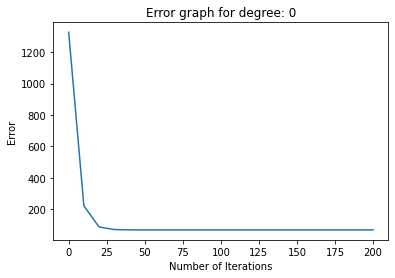

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  1  is:   68.58463068874471

Error values after each 10 complete iterations : 
[701.449665838821, 113.96593980102595, 91.3061651028234, 88.83065539811102, 87.17538138714919, 85.63847317032105, 84.18322090323038, 82.79840440299684, 81.4752698361998, 80.2064602333526, 78.98576653637953, 77.80794188296098, 76.66854671618204, 75.56381894881179, 74.49056510456889, 73.44606904485013, 72.42801543854327, 71.43442559203328, 70.46360364166847, 69.51409143386472, 68.58463068874471]


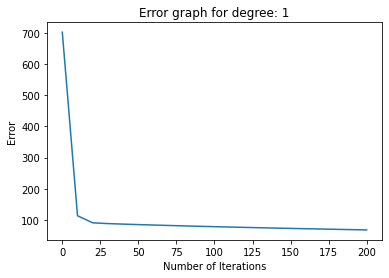

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  2  is:   64.00454145958967

Error values after each 10 complete iterations : 
[171.9398239385824, 135.46529620834986, 123.17272043872376, 114.04661803710924, 106.95429820717737, 101.29313656538821, 96.64776047727973, 92.72994496813683, 89.33943111303486, 86.33684920030382, 83.62498463596441, 81.1358155063038, 78.82154338274637, 76.64838694782597, 74.59228715432121, 72.63593493911266, 70.76671399643124, 68.97527667725508, 67.25455795381477, 65.59909249214803, 64.00454145958967]


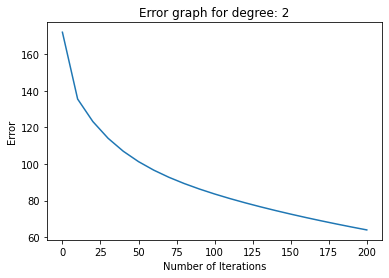

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  3  is:   21.05125528943841

Error values after each 10 complete iterations : 
[958.6960573538018, 51.50692536477413, 38.0095763627151, 33.01135558854796, 29.947940945889926, 27.99152546538818, 26.682314329087276, 25.755176252204524, 25.056969101771514, 24.499046280725274, 24.02991553995106, 23.619498255498492, 23.250066717931215, 22.911025768884226, 22.595907550452726, 22.300640325537426, 22.02255079566464, 21.759788725692676, 21.51099473178321, 21.27510810347571, 21.05125528943841]


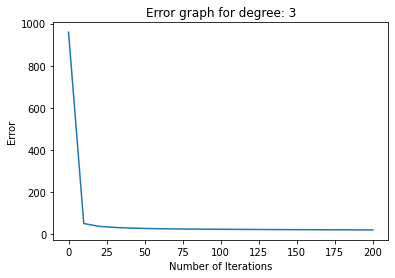

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  4  is:   31.27958922749746

Error values after each 10 complete iterations : 
[4423.228125585078, 230.14749726157777, 131.67765932808624, 88.24709352001835, 66.339039222023, 54.916129111551356, 48.63639471238659, 44.90534237967207, 42.460809035629005, 40.686897656063465, 39.28134080431254, 38.094210963439025, 37.04970313992411, 36.108193380297784, 35.247825037694625, 34.455563780018366, 33.72284453036223, 33.04344591182211, 32.412445800479595, 31.8257021100053, 31.27958922749746]


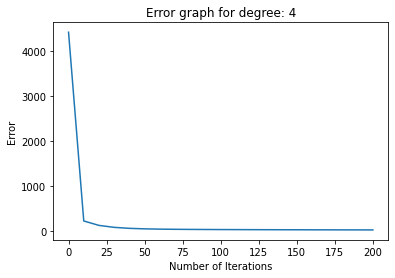

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  5  is:   43.28190542803139

Error values after each 10 complete iterations : 
[2818.0933618468325, 421.3793264746912, 218.5363074904979, 133.55685107840114, 96.4361016896758, 79.26494173570691, 70.50013663804984, 65.35783304604838, 61.84738159059107, 59.133205512711854, 56.858124974584314, 54.86376090136927, 53.0749399391307, 51.4518420006894, 49.97013606236782, 48.612685183345924, 47.366038890971865, 46.21891116143265, 45.16148602955348, 44.185071814716615, 43.28190542803139]


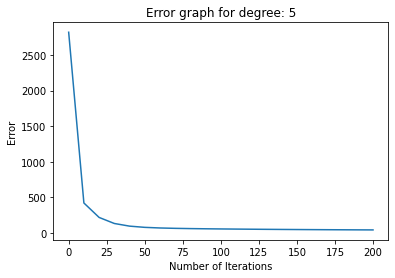

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  6  is:   86.13421988770638

Error values after each 10 complete iterations : 
[1072.0621273178178, 350.5616466560337, 275.1884666331907, 235.39492878567938, 209.8095876153198, 190.73709187648652, 175.24755810986616, 162.13046467350492, 150.80893574527195, 140.95093490551037, 132.3284768949204, 124.7653143214164, 118.11636689258009, 112.25869514982926, 107.08680666326727, 102.50970129029325, 98.44870724013214, 94.83574779967373, 91.61189065058409, 88.72610975877664, 86.13421988770638]


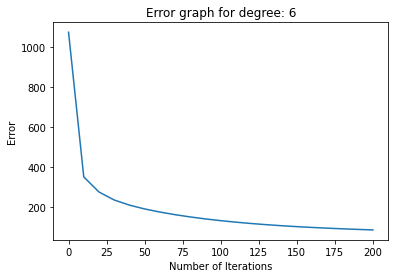

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  7  is:   34.11369086220229

Error values after each 10 complete iterations : 
[2612.5278682260187, 123.88487810472138, 68.45031451336475, 50.877799024751766, 44.82830549978869, 42.39240199560049, 41.1225527905185, 40.25640133024454, 39.55235397300071, 38.930419907605796, 38.36131872522336, 37.83214936495219, 37.33568446872698, 36.866967811000706, 36.422179860412214, 35.998216597172956, 35.59249995350608, 35.20286947099982, 34.82750719363749, 34.464879655783186, 34.11369086220229]


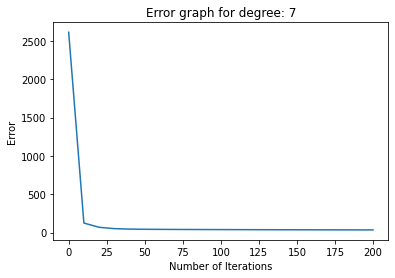

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  8  is:   31.152870205967012

Error values after each 10 complete iterations : 
[1190.2508810959496, 155.65506543424954, 74.64036868728405, 51.558703683295185, 44.212222001010154, 41.24087436109013, 39.565951319505245, 38.34242197899825, 37.32916185979564, 36.44955618355875, 35.67287008424273, 34.98207718646987, 34.36501111885355, 33.811825260712936, 33.3141730985497, 32.864870306224496, 32.457702312137215, 32.087284651182166, 31.748949300139277, 31.438648196820363, 31.152870205967012]


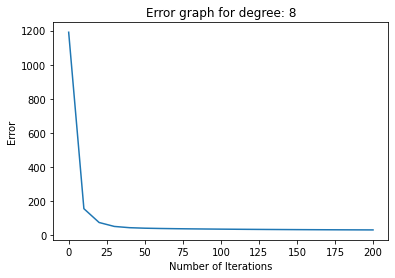

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
#For training data

minError = 100000
minErrorDeg = -1

x_axis=[]
for i in range(iter_scaled):
    x_axis.append(i*skip_num)

    
for i in range(10):

    GD_Error = GD(i, train_X, train_y, 0.1 , iter_value)
    if(GD_Error <= minError):
        minError = GD_Error
        minErrorDeg = i

    error_list = error_array[i].tolist()  
    print("\nError values after each 10 complete iterations : ")
    print(error_list)
    
    plt.plot(x_axis, error_list)
    plt.xlabel('Number of Iterations')
    plt.ylabel('Error')
    title = "Error graph for degree: " + str(i)
    plt.title(title)
    plt.show()
    print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    
    error_list=error_array[i].tolist()
    
print("Degree ", minErrorDeg, " gives minimum error.")      


In [ ]:
def testing_GD(deg, X, y, iterations):
                
    for itr in range(iterations):
        sumItrError = 0
        
        for z in range(len(X)):    # for each row in input data
            row = X.iloc[z]              # contains strength, temperature
            column = y.iloc[z]        # contains pressure
            dotP_wx = 0                 # variable for calculating error in each iteration
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    dotP_wx += coeff_list[deg][m][n] * (row[0]**m) * (row[1]**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            dotP_wx -= column[0]                    # yn - (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
            sumItrError +=  (dotP_wx**2)*0.5  
            
        if(itr == iterations - 1):
            print("Error of last iteration of degree ", deg, " :  " ,sumItrError)
            
    return sumItrError

In [ ]:
# for testing data

minError = 100000
minErrorDeg = -1
print("Testing errors for various degrees are as follows:")

for i in range(10):
    SGD_Error = testing_GD(i, test_X, test_y, iter_value)    
    if(SGD_Error <= minError):
        minError = SGD_Error
        minErrorDeg = i
        
print("Degree ", minErrorDeg, " gives minimum error. \n Testing error = ", minError) 